# Will a Client Default?

## By: Sathvik Baskaran, Shalin Luitel, and Keith Woods.

Between the Months of April and September 2005 a Taiwanese bank observed a significant default rate. This project not only aims to identify the primary factors and patterns behing the high default rate, but also to be able to predict if a new client will end up defaulting based on their credit repayment history.

There are a few motivations behind this project. For starters, Credit behavior insights are fundamental to risk management. Predicting whether or not a certain client (borrower) will default if vital for profit maximizations within financial institutions. We wanted to create a project that could be used by financial institutions to make better decisions when lending money. Having an automated system that can make informed decisions will accelerate the money lending process when taking on new clients, bringing benefits to both the lender and the borrower.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

Our dataset, "default of credit card clients", is taken from the University of California Irvine's Machine Learning Repository. It contains 24 features ranging from personal demographics to credit details for each borrower. The dataset is taken between the months of April and September 2005 and has information on 30,000 borrowers. The most important data points for this project are history of past payments (contains information on how late/ early a payment is), History of amount on bill statement (contains the bill statements of each borrower), and default on payment next month (A binary value indicating whether a client will default next month or not).

In [ ]:
df = pd.read_csv("/Users/sathvikbaskaran/Documents/University/Years/Senior/Summer/info213/midterm/default of credit card clients.csv", header=1)
data = df.drop(columns='ID')
# data = data.drop(columns='AGE')
# data = data.drop(columns='MARRIAGE')

In [3]:
data['TOTAL_BILL'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
data['TOTAL_PAY'] = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)


In [4]:
scaler = StandardScaler()
columns_to_scale = ['LIMIT_BAL', 'TOTAL_BILL', 'TOTAL_PAY']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [5]:
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
mask = y_train == 1
X_over = X_train[mask].sample(y_train.value_counts()[0] - y_train.value_counts()[1], replace=True, random_state=42)
y_over = y_train[mask].sample(y_train.value_counts()[0] - y_train.value_counts()[1], replace=True, random_state=42)
X_train = pd.concat([X_train, X_over], axis=0)
y_train = pd.concat([y_train, y_over], axis=0)

To start our analysis off, Logistic Regression Model was chosen. This model was chosen because it has the ability to handle categorical data, it doesn't require input features to be non-negative, and the coefficients from this model can provide insights into the effect of each feature on the prediction.

In [7]:
# Logistic Regression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4786666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.38      0.53      4687
           1       0.27      0.82      0.41      1313

    accuracy                           0.48      6000
   macro avg       0.58      0.60      0.47      6000
weighted avg       0.75      0.48      0.51      6000



The Logistic Regression model being run on this dataset does not do a very good job of answering the question, "Will a Client default?" shown as the 1 value in the classification report with a precision of 27%. It is however very good at answering the question, "Will a client not default?", shown as the 0 value in the classification report. The model overall has an accuracy of 48% and is very accurate in answering the question represented by the 0 value with a precision of 89%. 

The results from using the Logistic Regression model were not great, so it was decided that the next model that would be used is the Decision Tree. The Decision Tree is a powerful model that has a few pros that would be useful for the project's problem. It has the ability to deal with both numerical and categorical data, it ranks features based on the importance in making decisions, it is able to capture non-linear relationships, and it is very flexible with data.

In [8]:
# Decision Tree Classifier

clf_dt = DecisionTreeClassifier(random_state=42)  
clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy Score: 0.7365

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      4687
           1       0.40      0.39      0.39      1313

    accuracy                           0.74      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.74      0.74      0.74      6000



Compared to the Logistic Regression model, this models performs much better, especially when considering the problem this project intends to solve. The model overall has a much higher accuracy score and does significantly better at answering the question, "Will a client default?", than the Logistic Regression model with an precision of 40% compared to the previous 27%. It doesn't do as much of a good job at answering the question, "Will a client not default?", getting a score of 83% for the Decision Tree versus the previous 89%. This model's overall accuracy is much higher than the previous model's gaining an accuracy score of 74% versus the Logistic Regression model's score of 48%.

Hoping for beter results than the previous two models, it was decided that the Random Forest would be run on the dataset. The Random Forest model has many of the pros as the decision tree but is said to be a much more accurate classifier than both the models that have been used so far. Some reasons as to why the Random Forest model is so good as what it does are that it is able to handle overfitting, it can handle large datasets, and like the decision tree model, it is very flexable and can rank the importance of features.

In [9]:
# Random Forest Classifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_rf_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))


Accuracy: 0.808

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.58      0.42      0.49      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



Of all the models tested so far, the random forest performs the best. It has the highest accuracy score at 80% and does the best at solving the problem that this project intends on solving gaining a precision score of 58% when answering the question, "Will a client default?". Although the precision score still isn't the best, it performs the best out of all models tested and would be the best choice of the three that were used in this project.

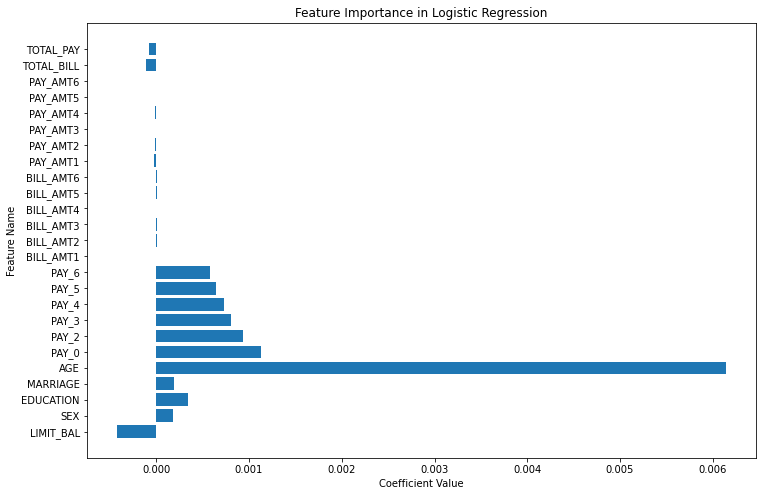

In [10]:
# Coefficients Graph

features = X_train.columns

coefficients = clf.coef_[0]

plt.figure(figsize=(12,8))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Logistic Regression')
plt.show()

One last thing that this project wanted to look at was the impact of a feature on predicting whether or not a client will default or not. Finding these features can be accomplished with the Logistic Regression Model. The graph above can be used to see that the feature that has the biggest overall impact on predicting whether a client will default or not is "AGE". Based on the model, a person's age dictates whether they will default or not more than any other feature that we have tested. In the negative direction a person's balance limit will dictate the predictions more than any other feature.

In the end the Random Forest was the strongest classifier and was able to perform better than both the logistic regression model and the decision tree model. It came up with both the best overall accuracy and best precision when answering the question, "Will a client default?". While working on this there were a few roadblocks that were hit due to the nature of the model that didn't allow the use of certain models like Naive Bayes. This model was used initially but came up with terrible results due to it not being able to handle negative values. In the future this project may want to encompass data from different countries as well as different time periods in order to come up with better results that aren't specific to just one country. Other models that may also be used as more research is done.